In [49]:
import pandas as pd

# MVTEC Dataset

In [50]:
keras = pd.read_csv("Keras_metrics.csv").round(4)
gluon = pd.read_csv("Autogluon_metrics.csv").round(4)

keras_tile = pd.read_csv("Keras_metrics_tile.csv").round(4)
gluon_tile = pd.read_csv("Autogluon_metrics_tile.csv").round(4)

keras_capsule = pd.read_csv("Keras_metrics_capsule.csv").round(4)
gluon_capsule = pd.read_csv("Autogluon_metrics_capsule.csv").round(4)

In [51]:
keras_table = keras.to_latex(index=False, float_format="{:20f}".format)
gluon = gluon.drop(columns = "Unnamed: 0", axis = 1)
gluon_table = gluon.to_latex(index=False)

keras_tile_table = keras_tile.to_latex(index=False, float_format="{:20f}".format)
gluon_tile = gluon_tile.drop(columns = "Unnamed: 0", axis = 1)
gluon_tile_table = gluon_tile.to_latex(index=False)

keras_capsule_table = keras_capsule.to_latex(index=False, float_format="{:20f}".format)
gluon_capsule = gluon_capsule.drop(columns = "Unnamed: 0", axis = 1)
gluon_capsule_table = gluon_capsule.to_latex(index=False)


print(keras_table)
print(gluon_table)
print(keras_tile_table)
print(gluon_tile_table)
print(keras_capsule_table)
print(gluon_capsule_table)

\begin{tabular}{rrrrl}
\toprule
            Accuracy &              ROC AUC &            Precision &             F1-score &    Time \\
\midrule
            0.666700 &             0.708300 &             1.000000 &             0.500000 & 129m57s \\
            0.729200 &             0.908900 &             0.923100 &             0.648600 & 204m11s \\
            0.437500 &             0.447000 &             0.466700 &             0.608700 & 304m37s \\
            0.791700 &             0.833300 &             0.850000 &             0.772700 & 226m49s \\
            0.687500 &             0.776900 &             0.636400 &             0.736800 & 314m48s \\
            0.833300 &             0.913200 &             0.807700 &             0.840000 & 217m28s \\
            0.687500 &             0.778600 &             0.736800 &             0.651200 & 174m52s \\
            0.750000 &             0.785600 &             0.800000 &             0.727300 & 191m48s \\
            0.562500 &          

In [52]:
# get the best models
def get_min(df):
    print(df[["Accuracy"]].idxmax())
    print(df[["ROC AUC"]].idxmax())
    print(df[["Precision"]].idxmax())
    print(df[["F1-score"]].idxmax())

In [53]:
get_min(keras)
print("################")
get_min(keras_tile)
print("################")
get_min(keras_capsule)

Accuracy    5
dtype: int64
ROC AUC    5
dtype: int64
Precision    0
dtype: int64
F1-score    5
dtype: int64
################
Accuracy    0
dtype: int64
ROC AUC    2
dtype: int64
Precision    3
dtype: int64
F1-score    8
dtype: int64
################
Accuracy    3
dtype: int64
ROC AUC    6
dtype: int64
Precision    3
dtype: int64
F1-score    3
dtype: int64


In [54]:
def get_miutes(df):
    time = []
    for i in range(len(df)):

        
        time_string = df["Time"][i]
        minutes_str, seconds_str = time_string.split('m')
        seconds_str = seconds_str.rstrip('s')  
        
        minutes = int(minutes_str)
        seconds = int(seconds_str)
        total_minutes = minutes + (seconds / 60)
        time.append(total_minutes)
    return time

tgluon = get_miutes(gluon)
tkeras = get_miutes(keras)
keras["minutes"] = tkeras
gluon["minutes"] = tgluon

tgluon_tile = get_miutes(gluon_tile)
tkeras_tile = get_miutes(keras_tile)
keras_tile["minutes"] = tkeras_tile
gluon_tile["minutes"] = tgluon_tile

tgluon_capsule = get_miutes(gluon_capsule)
tkeras_capsule = get_miutes(keras_capsule)
keras_capsule["minutes"] = tkeras_capsule
gluon_capsule["minutes"] = tgluon_capsule

In [55]:
def table(gluon, keras):
    overview = pd.DataFrame(columns = ["Framework","Accuracy", "ROC AUC", "Precision","F1-Score", "Time"])

    r1 = ["Autogluon",
          str(round(gluon["Accuracy"].mean(),4)) + " \u00b1 " + str(round(gluon["Accuracy"].std(),4)), 
          str(round(gluon["ROC AUC"].mean(),4))+ " \u00b1 " + str(round(gluon["ROC AUC"].std(),4)), 
          str(round(gluon["Precision"].mean(),4))+ " \u00b1 " + str(round(gluon["Precision"].std(),4)), 
          str(round(gluon["F1-score"].mean(),4))+ " \u00b1 " + str(round(gluon["F1-score"].std(),4)),
          str(round(gluon["minutes"].mean(),4))+ " \u00b1 " + str(round(gluon["minutes"].std(),4)),]  

    r2 = ["AutoKeras",
          str(round(keras["Accuracy"].mean(),4)) + " \u00b1 " + str(round(keras["Accuracy"].std(),4)), 
          str(round(keras["ROC AUC"].mean(),4))+ " \u00b1 " + str(round(keras["ROC AUC"].std(),4)), 
          str(round(keras["Precision"].mean(),4))+ " \u00b1 " + str(round(keras["Precision"].std(),4)), 
          str(round(keras["F1-score"].mean(),4))+ " \u00b1 " + str(round(keras["F1-score"].std(),4)),
          str(round(keras["minutes"].mean(),4))+ " \u00b1 " + str(round(keras["minutes"].std(),4)),]  

    overview.loc[len(overview)] = r1
    overview.loc[len(overview)] = r2
    overview_table = overview.to_latex(index=False)
    print(overview_table)
    return overview

In [56]:
tab_tile = table(gluon_tile, keras_tile)

\begin{tabular}{llllll}
\toprule
Framework &        Accuracy &         ROC AUC &       Precision &        F1-Score &               Time \\
\midrule
Autogluon &  0.797 ± 0.1751 & 0.9734 ± 0.0665 & 0.7443 ± 0.3143 & 0.7718 ± 0.2881 &    0.4833 ± 0.3222 \\
AutoKeras & 0.7294 ± 0.1473 & 0.7521 ± 0.1565 & 0.7256 ± 0.2888 &   0.747 ± 0.195 & 161.2183 ± 48.1883 \\
\bottomrule
\end{tabular}



In [57]:
tab_capsule = table(gluon_capsule, keras_capsule)

\begin{tabular}{llllll}
\toprule
Framework &        Accuracy &         ROC AUC &       Precision &        F1-Score &                Time \\
\midrule
Autogluon & 0.5909 ± 0.1198 & 0.8017 ± 0.0778 & 0.4279 ± 0.3208 & 0.5092 ± 0.3551 &     0.9083 ± 0.1729 \\
AutoKeras &   0.85 ± 0.0983 & 0.9109 ± 0.0726 & 0.8524 ± 0.1272 & 0.8572 ± 0.0825 & 315.0767 ± 285.5371 \\
\bottomrule
\end{tabular}



In [58]:
tab_screw = table(gluon, keras)

\begin{tabular}{llllll}
\toprule
Framework &        Accuracy &         ROC AUC &       Precision &        F1-Score &               Time \\
\midrule
Autogluon & 0.5375 ± 0.0508 & 0.6739 ± 0.0737 & 0.4855 ± 0.2998 & 0.4727 ± 0.2956 &    0.9417 ± 0.2585 \\
AutoKeras & 0.6854 ± 0.1139 &  0.7576 ± 0.137 &   0.75 ± 0.1638 & 0.6785 ± 0.0972 & 221.3267 ± 55.5236 \\
\bottomrule
\end{tabular}



In [59]:
from scipy.stats import mannwhitneyu
import numpy as np
# Mann Whitney U test
def hypothesis(keras, gluon):
    test = pd.DataFrame(columns = ["Hypothesis","Accuracy", "ROC AUC", "Precision","F1-Score"])
    row_1 = ["H1"]
    row_2 = ["H2"]
    for i in ["Accuracy", "ROC AUC", "Precision","F1-score"]:
        # chekc if Akreas better metrics
        stats1, p1 = mannwhitneyu(keras[i].to_numpy(), gluon[i].to_numpy(),alternative = "less", method="exact")
        row_1.append(p1)
        # check if metrics are different
        stats2, p2 = mannwhitneyu(keras[i].to_numpy(), gluon[i].to_numpy(),alternative = "two-sided", method="exact")
        row_2.append(p2)

    test.loc[len(test)] = row_1
    test.loc[len(test)] = row_2
    test_table = test.to_latex(index=False)
    print(test_table)

In [60]:
hypothesis(keras_tile, gluon_tile)

\begin{tabular}{lrrrr}
\toprule
Hypothesis &  Accuracy &  ROC AUC &  Precision &  F1-Score \\
\midrule
        H1 &  0.157500 & 0.000103 &   0.426714 &  0.240625 \\
        H2 &  0.314999 & 0.000206 &   0.853428 &  0.481251 \\
\bottomrule
\end{tabular}



# Plot Distributions

In [81]:
import numpy as np
import matplotlib.pyplot as plt

def distribution(metric):
    x = np.linspace(0, 1, 100)
    categories = ['Capsule', 'Tile', 'Screw']
    y_values = np.arange(len(categories))

    data_arrays = {
        'Capsule': [keras_capsule[metric].to_numpy(), gluon_capsule[metric].to_numpy()],
        'Tile': [keras_tile[metric].to_numpy(), gluon_tile[metric].to_numpy()],
        'Screw': [keras[metric].to_numpy(),gluon[metric].to_numpy()]
    }

    colors = ['blue', 'orange']

    plt.figure(figsize=(15, 3.5))

    for i, category in enumerate(categories):
        for j, data_array in enumerate(data_arrays[category]):
            if j < 2:
                label = f'Dataset {j + 1}'
                plt.scatter(data_array, [y_values[i]] * len(data_array), color=colors[j], marker='D', label=label, alpha=0.5)
            else:
                plt.scatter(data_array, [y_values[i]] * len(data_array), color=colors[j], marker='D', alpha=0.8)

    plt.yticks(y_values, categories) 
    plt.gca().get_yaxis().set_tick_params(size=0)  

    plt.xticks(np.arange(0, 1.1, 0.1))  
    plt.xlabel(metric)
    plt.xlim(-0.1, 1.1) 

    plt.legend(handles=[plt.Line2D([0], [0], marker='D', color='w', markerfacecolor='blue', alpha = 0.8, markersize=10, label='AutoKeras'),
                        plt.Line2D([0], [0], marker='D', color='w', markerfacecolor='orange', alpha = 0.8, markersize=10, label='AutoGluon')],
               loc='upper right', bbox_to_anchor=(1, 0.9)) 
    
    
    plt.gca().set_axisbelow(True)
    
    title = metric + " Distribution"
    plt.title(title)
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(metric+ " Distribution")
    plt.show()

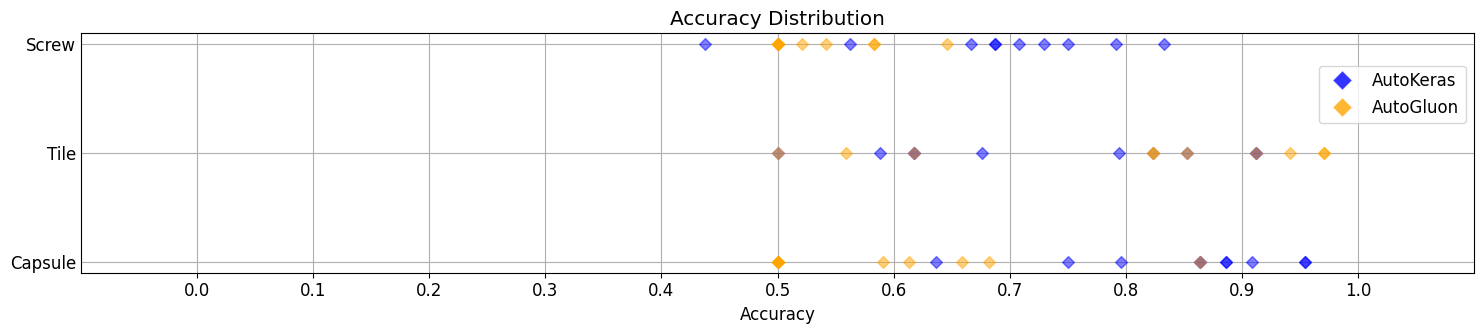

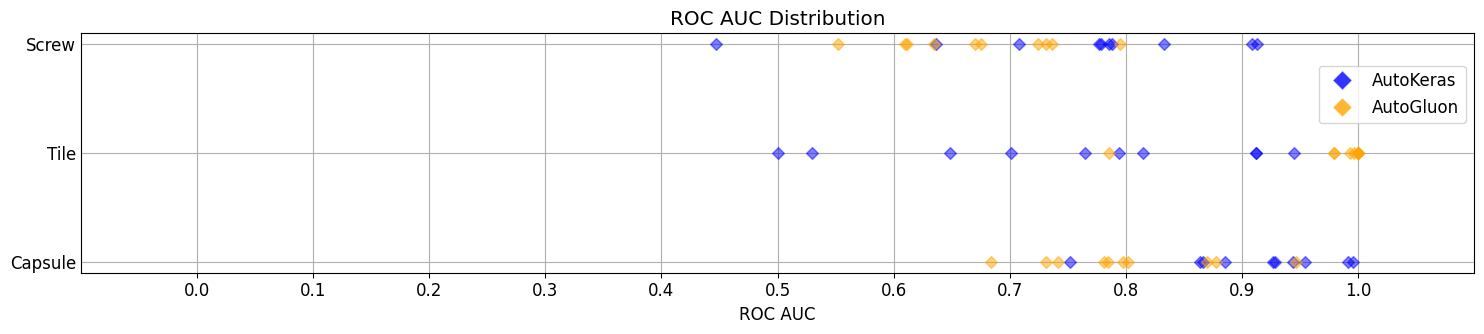

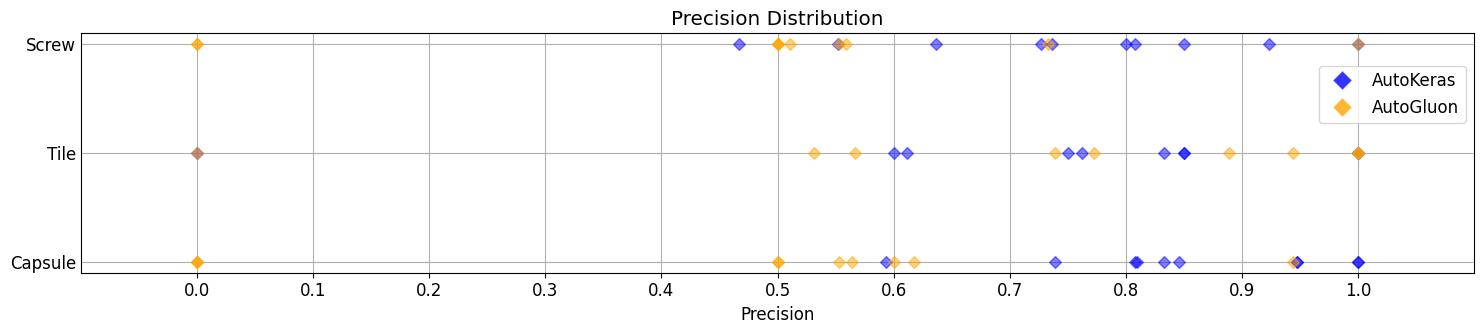

In [82]:
distribution("Accuracy")
distribution("ROC AUC")
distribution("Precision")

# Time Plot

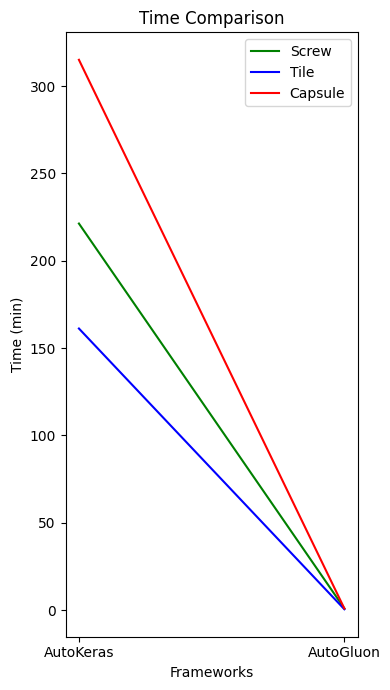

In [192]:
import matplotlib.pyplot as plt


categories = ['AutoKeras', 'AutoGluon']
screw_values = [round(keras["minutes"].mean(),4), round(gluon["minutes"].mean(),4)]
tile_values = [round(keras_tile["minutes"].mean(),4), round(gluon_tile["minutes"].mean(),4)]
capsule_values = [round(keras_capsule["minutes"].mean(),4), round(gluon_capsule["minutes"].mean(),4)]

plt.figure(figsize=(4, 7))  

plt.plot(categories, screw_values, label='Screw', color="green")
plt.plot(categories, tile_values,  label='Tile', color="blue")
plt.plot(categories, capsule_values, label='Capsule', color="red")

plt.xlabel('Frameworks') 
plt.ylabel('Time (min)')  
plt.title('Time Comparison')  

plt.legend() 

plt.tight_layout()  
plt.savefig("Mean time")
plt.show()  


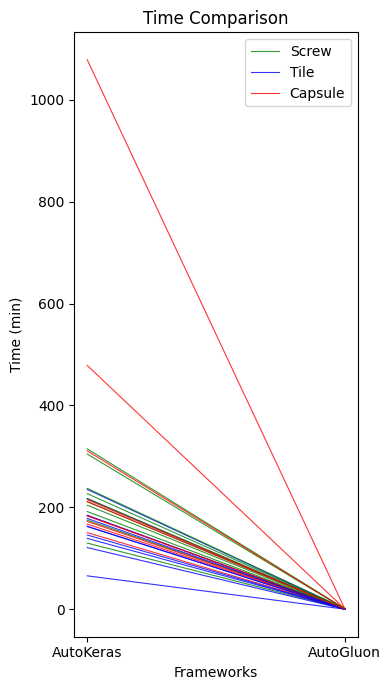

In [191]:
import matplotlib.pyplot as plt
import numpy as np


categories = ['AutoKeras', 'AutoGluon']

screw_values = []
tile_values = []
capsule_values = []

num_iterations = 10  # 10 trials

for i in range(num_iterations):
    screw_values.append([keras["minutes"].iloc[i], gluon["minutes"].iloc[i]])
    tile_values.append([keras_tile["minutes"].iloc[i], gluon_tile["minutes"].iloc[i]])
    capsule_values.append([keras_capsule["minutes"].iloc[i], gluon_capsule["minutes"].iloc[i]])


plt.figure(figsize=(4, 7))  


for i in range(num_iterations):
    plt.plot(categories, screw_values[i],  label=f'Iteration {i+1}', color="green", alpha=0.8, linewidth=0.8)
    plt.plot(categories, tile_values[i],  color="blue", alpha=0.8, linewidth=0.8)
    plt.plot(categories, capsule_values[i], color="red", alpha=0.8, linewidth=0.8)


plt.legend(['Screw', 'Tile', 'Capsule'])

plt.xlabel('Frameworks')  
plt.ylabel('Time (min)')  
plt.title('Time Comparison')  

plt.tight_layout()  
plt.savefig("all time")
plt.show()  

